In [ ]:
import numpy as np
import random
!pip install keyboard
import keyboard
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#0 = brulé
#1 = en feu
#2 = verdure

In [ ]:
def create_NDVI(n):
  NDVI=np.zeros((n,n))
  lamb=0.1
  #generation de ndvi
  x0=random.random()
  NDVI[0][0]=x0
  for i in range(1,n):
      NDVI[0][i]=min(max(NDVI[0][i-1]+ lamb*(random.random()-0.5),0.2),1)
  for i in range(1,n):
      NDVI[i][0]=min(max(NDVI[i-1][0]+ lamb*(random.random()-0.5),0.2),1)
  for i in range(1,n):
    for j in range(1,n):
      NDVI[i][j]=min(max((NDVI[i-1][j]+NDVI[i][j-1])/2+ lamb*(random.random()-0.5),0.0001),1)
  return(NDVI)

In [ ]:
def sigmoide(x):
  return (1/(1-np.exp(-x)))

In [ ]:
def fonction_a_trouver (a,b,ndvi,vent,proportion_vent):#proportion vent dépend de la direction par rapport au sens du vent
  return (ndvi*(a*proportion_vent*vent+b))

In [ ]:
def automate_cellulaire_bidimentionel (a,b, NDVI, point, vent, direction_vent, temps_en_feu):#direction vent : [0,...,7]=[NO,N,NE,E,...,O]
  points_en_feu = [point]
  n=len(NDVI)
  tab=np.zeros((n,n))
  for i in range (n):
    tab[i]=2
  tab[point]=1
  temps = np.zeros((n,n))
  nb_points_en_feu=1
  nb_points_brulés=0
  while (nb_points_en_feu>0):
    new_points_en_feu=[]
    nb_points_en_feu=0
    for (i,j) in points_en_feu:
      if (i>0 and tab[i-1][j]==2 and 0.5<fonction_a_trouver(a, b, NDVI[i-1][j],vent, 1*(direction_vent==1)+0.5*(direction_vent==0 or direction_vent==2)-0.5*(direction_vent==4 or direction_vent==6)-1*(direction_vent==5))):
          tab[i-1][j]=1
          new_points_en_feu.append((i-1,j))
          nb_points_en_feu+=1
      if (i<n-1 and tab[i+1][j]==2 and 0.5<fonction_a_trouver(a, b, NDVI[i+1][j],vent, 1*(direction_vent==5)+0.5*(direction_vent==4 or direction_vent==6)-0.5*(direction_vent==0 or direction_vent==2)-1*(direction_vent==1))):
          tab[i+1][j]=1
          new_points_en_feu.append((i+1,j))
          nb_points_en_feu+=1
      if (j>0 and tab[i][j-1]==2 and 0.5<fonction_a_trouver(a, b, NDVI[i][j-1],vent, 1*(direction_vent==7)+0.5*(direction_vent==6 or direction_vent==0)-0.5*(direction_vent==2 or direction_vent==4)-1*(direction_vent==3))):
          tab[i][j-1]=1
          new_points_en_feu.append((i,j-1))
          nb_points_en_feu+=1
      if (j<n-1 and tab[i][j+1]==2 and 0.5<fonction_a_trouver(a, b, NDVI[i][j+1],vent, 1*(direction_vent==3)+0.5*(direction_vent==2 or direction_vent==4)-0.5*(direction_vent==6 or direction_vent==0)-1*(direction_vent==7))):
          tab[i][j+1]=1
          new_points_en_feu.append((i,j+1))
          nb_points_en_feu+=1
      temps[i][j]+=1
      if (temps[i][j]==temps_en_feu):
        tab[i][j]=0
        nb_points_brulés+=1
      else : 
        new_points_en_feu.append((i,j))
        nb_points_en_feu+=1
    points_en_feu = new_points_en_feu
  return nb_points_brulés

In [ ]:
liste_NDVI_point_vent_tempsenfeu_val_directionvent=[]
n=100
for i in range(100):
  NDVI=create_NDVI(n)
  point=(n//2,n//2)
  vent=random.random()
  directionvent=random.randint(0,7)
  tempsenfeu=1
  a=0.2
  b=0.9
  val=automate_cellulaire_bidimentionel (a,b, NDVI, point, vent, directionvent, tempsenfeu)
  print(val)
  liste_NDVI_point_vent_tempsenfeu_val_directionvent.append([NDVI,point,vent,tempsenfeu,val,directionvent])


1
1
9998
1
1
10000
10000
1
1
8237
5483
444
9963
822
1
1
8389
1
5469
1
9917
1
1
5857
9999
9382
1
1
1
1
1
9899
1
1
9330
9756
1
1
1
7381
2
1
10000
1
3915
1
7184
9994
10000
1
5789
10000
4300
3900
1
9995
10000
1
1
1
10000
10000
1
5825
1
4930
1
8988
1
1
1
1
4036
1
5098
9997
9902
9207
1
1
1
1
1
1
1
1
1
9997
1
1
6328
1
1
1
1
2616
1
9532
1
3762


In [ ]:
def calcul(a,b,liste_NDVI_point_vent_tempsenfeu_val_directionvent,nb_moyennement):
  sum=0
  for j in liste_NDVI_point_vent_tempsenfeu_val_directionvent:
    val=0
    for i in range(nb_moyennement):
      val+=automate_cellulaire_bidimentionel(a,b, j[0],j[1],j[2],j[5],j[3])
    sum+=np.abs(j[4]-val/nb_moyennement)
  return sum/len(liste_NDVI_point_vent_tempsenfeu_val_directionvent)

In [ ]:
def apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val_directionvent,nb_moyennement,seuil,xs,ys,zs,h):
  xs.append(a)
  ys.append(b)
  val=calcul(a, b, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  zs.append(val)
  print(a,b)
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs, ys, zs, c='m')
  ax.scatter([0.2], [0.9], [0], c='r')
  ax.set_xlabel("paramètre du vent")
  ax.set_ylabel("paramètre de l'humidité")
  ax.set_zlabel("erreur")
  plt.show()
  print("val =",val,"et h=",h)
  if (val<0.1):
    return (a,b)
  a_0=val_aph=calcul(a-h, b-h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_0=",a_0)
  a_1=val_aph=calcul(a-h, b, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_1=",a_1)
  a_2=val_aph=calcul(a-h, b+h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_2=",a_2)
  a_3=val_aph=calcul(a, b-h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_3=",a_3)
  a_4=val_aph=calcul(a, b+h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_4=",a_4)
  a_5=val_aph=calcul(a+h, b-h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_5=",a_5)
  a_6=val_aph=calcul(a+h, b, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_6=",a_6)
  a_7=val_aph=calcul(a+h, b+h, liste_NDVI_point_vent_tempsenfeu_val_directionvent, nb_moyennement)
  print("a_7=",a_7)
  min_=min(a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7)
  print(min_)
  if min_<val:
    print("inf trouvé")
    if a_0==min_:
      print("a_0==min_")
      a-=h
      b-=h
    elif a_1==min_:
      print("a_1==min_")
      a-=h
    elif a_2==min_:
      print("a_2==min_")
      a-=h
      b+=h
    elif a_3==min_:
      print("a_3==min_")
      b-=h
    elif a_4==min_:
      print("a_4==min_")
      b+=h
    elif a_5==min_:
      print("a_5==min_")
      a+=h
      b-=h
    elif a_6==min_:
      print("a_6==min_")
      a+=h
    elif a_7==min_:
      print("a_7==min_")
      a+=h
      b+=h
    apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val_directionvent,nb_moyennement,seuil,xs,ys,zs,0.01)
  else:
    apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val_directionvent,nb_moyennement,seuil,xs,ys,zs,h+0.01)


0.5 0.5


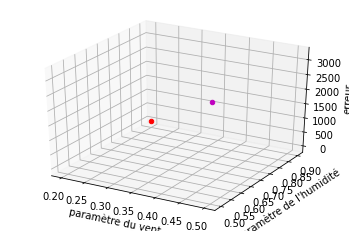

val = 3180.15 et h= 0.01
a_0= 3189.81
a_1= 3182.95
a_2= 3152.78
a_3= 3188.21
a_4= 3151.3
a_5= 3187.04
a_6= 3175.53
a_7= 3148.98
3148.98
inf trouvé
a_7==min_
0.51 0.51


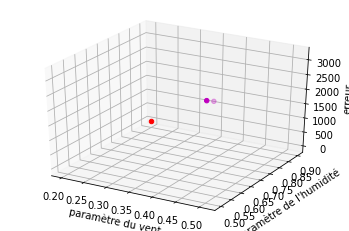

val = 3148.98 et h= 0.01
a_0= 3180.15
a_1= 3151.3
a_2= 3125.0
a_3= 3175.53
a_4= 3123.2
a_5= 3172.9
a_6= 3146.84
a_7= 3121.34
3121.34
inf trouvé
a_7==min_
0.52 0.52


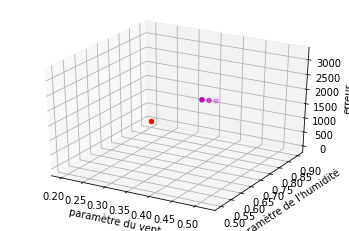

val = 3121.34 et h= 0.01
a_0= 3148.98
a_1= 3123.2
a_2= 3102.87
a_3= 3146.84
a_4= 3098.31
a_5= 3145.9
a_6= 3119.2
a_7= 3096.5
3096.5
inf trouvé
a_7==min_
0.53 0.53


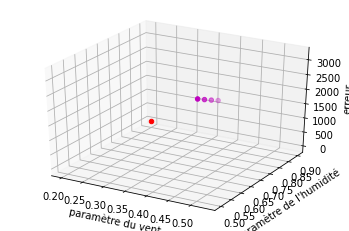

val = 3096.5 et h= 0.01
a_0= 3121.34
a_1= 3098.31
a_2= 3063.86
a_3= 3119.2
a_4= 3062.17
a_5= 3117.73
a_6= 3094.62
a_7= 3060.95
3060.95
inf trouvé
a_7==min_
0.54 0.54


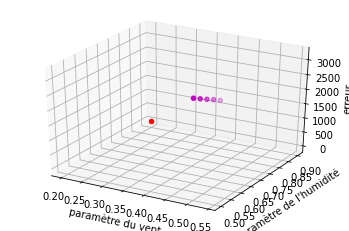

val = 3060.95 et h= 0.01
a_0= 3096.5
a_1= 3062.17
a_2= 3004.28
a_3= 3094.62
a_4= 3002.89
a_5= 3093.57
a_6= 3060.01
a_7= 2996.16
2996.16
inf trouvé
a_7==min_
0.55 0.55


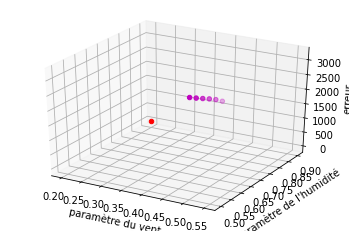

val = 2996.16 et h= 0.01
a_0= 3060.95
a_1= 3002.89
a_2= 2965.51
a_3= 3060.01
a_4= 2962.78
a_5= 3058.81
a_6= 2992.9
a_7= 2962.25
2962.25
inf trouvé
a_7==min_
0.56 0.56


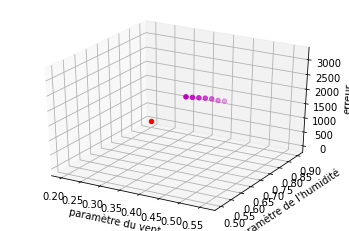

val = 2962.25 et h= 0.01
a_0= 2996.16
a_1= 2962.78
a_2= 2898.0
a_3= 2992.9
a_4= 2896.4
a_5= 2991.94
a_6= 2960.94
a_7= 2884.02
2884.02
inf trouvé
a_7==min_
0.5700000000000001 0.5700000000000001


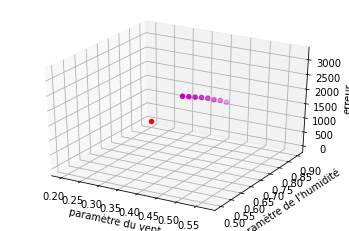

val = 2884.02 et h= 0.01
a_0= 2962.25
a_1= 2896.4
a_2= 2843.25
a_3= 2960.94
a_4= 2842.19
a_5= 2936.95
a_6= 2879.74
a_7= 2841.19
2841.19
inf trouvé
a_7==min_
0.5800000000000001 0.5800000000000001


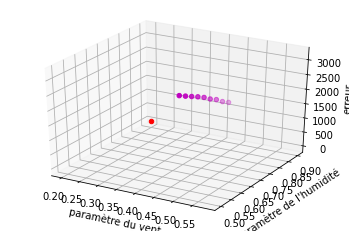

val = 2841.19 et h= 0.01
a_0= 2884.02
a_1= 2842.19
a_2= 2803.03
a_3= 2879.74
a_4= 2802.29
a_5= 2878.67
a_6= 2839.45
a_7= 2800.77
2800.77
inf trouvé
a_7==min_
0.5900000000000001 0.5900000000000001


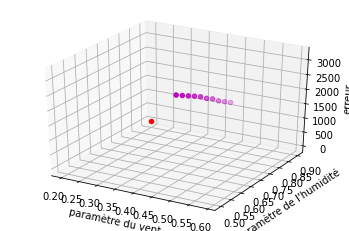

val = 2800.77 et h= 0.01
a_0= 2841.19
a_1= 2802.29
a_2= 2751.07
a_3= 2839.45
a_4= 2749.32
a_5= 2837.8
a_6= 2799.0
a_7= 2748.14
2748.14
inf trouvé
a_7==min_
0.6000000000000001 0.6000000000000001


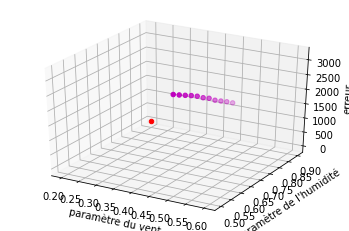

val = 2748.14 et h= 0.01
a_0= 2800.77
a_1= 2749.32
a_2= 2666.97
a_3= 2799.0
a_4= 2665.03
a_5= 2797.97
a_6= 2742.86
a_7= 2664.82
2664.82
inf trouvé
a_7==min_
0.6100000000000001 0.6100000000000001


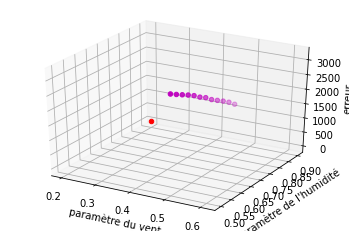

val = 2664.82 et h= 0.01
a_0= 2748.14
a_1= 2665.03
a_2= 2609.7
a_3= 2742.86
a_4= 2610.13
a_5= 2740.38
a_6= 2663.29
a_7= 2615.47
2609.7
inf trouvé
a_2==min_
0.6000000000000001 0.6200000000000001


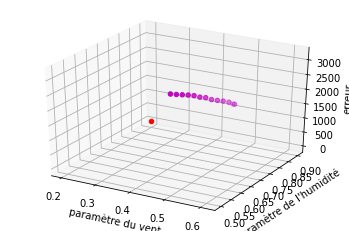

val = 2609.7 et h= 0.01
a_0= 2666.97
a_1= 2610.29
a_2= 2562.95
a_3= 2665.03
a_4= 2570.54
a_5= 2664.82
a_6= 2610.13
a_7= 2569.83
2562.95
inf trouvé
a_2==min_
0.5900000000000001 0.6300000000000001


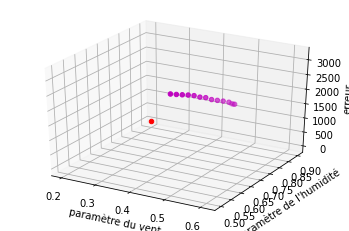

val = 2562.95 et h= 0.01
a_0= 2610.62
a_1= 2563.97
a_2= 2360.51
a_3= 2610.29
a_4= 2361.8
a_5= 2609.7
a_6= 2570.54
a_7= 2360.22
2360.22
inf trouvé
a_7==min_
0.6000000000000001 0.6400000000000001


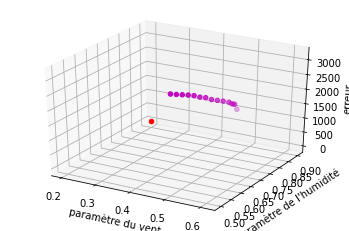

val = 2360.22 et h= 0.01
a_0= 2562.95
a_1= 2361.8
a_2= 2257.44
a_3= 2570.54
a_4= 2254.35
a_5= 2569.83
a_6= 2409.78
a_7= 2254.38
2254.35
inf trouvé
a_4==min_
0.6000000000000001 0.6500000000000001


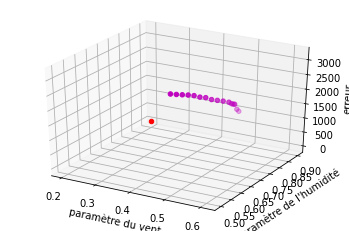

val = 2254.35 et h= 0.01
a_0= 2361.8
a_1= 2257.44
a_2= 2195.6
a_3= 2360.22
a_4= 2200.08
a_5= 2409.78
a_6= 2254.38
a_7= 2197.01
2195.6
inf trouvé
a_2==min_
0.5900000000000001 0.6600000000000001


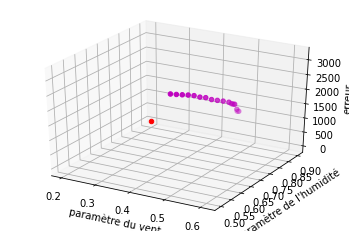

val = 2195.6 et h= 0.01
a_0= 2257.71
a_1= 2195.02
a_2= 2103.74
a_3= 2257.44
a_4= 2104.09
a_5= 2254.35
a_6= 2200.08
a_7= 2111.45
2103.74
inf trouvé
a_2==min_
0.5800000000000001 0.6700000000000002


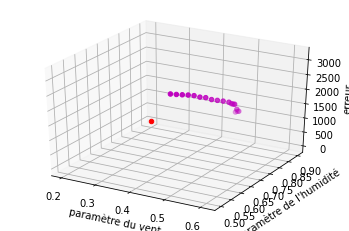

val = 2103.74 et h= 0.01
a_0= 2197.62
a_1= 2101.73
a_2= 2034.52
a_3= 2195.02
a_4= 2038.86
a_5= 2195.6
a_6= 2104.09
a_7= 2041.49
2034.52
inf trouvé
a_2==min_
0.5700000000000001 0.6800000000000002


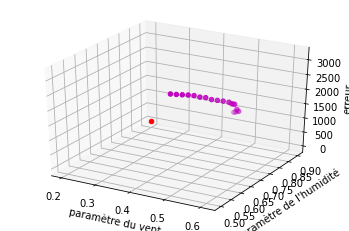

val = 2034.52 et h= 0.01
a_0= 2098.06
a_1= 2031.71
a_2= 1983.88
a_3= 2101.73
a_4= 1981.59
a_5= 2103.74
a_6= 2038.86
a_7= 1983.33
1981.59
inf trouvé
a_4==min_
0.5700000000000001 0.6900000000000002


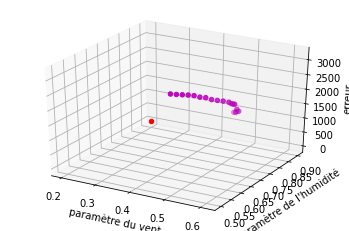

val = 1981.59 et h= 0.01
a_0= 2031.71
a_1= 1983.88
a_2= 1934.25
a_3= 2034.52
a_4= 1933.14
a_5= 2038.86
a_6= 1983.33
a_7= 1932.48
1932.48
inf trouvé
a_7==min_
0.5800000000000001 0.7000000000000002


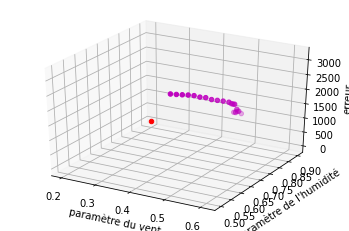

val = 1932.48 et h= 0.01
a_0= 1981.59
a_1= 1933.14
a_2= 1906.04
a_3= 1983.33
a_4= 1909.61
a_5= 1982.8
a_6= 1940.64
a_7= 1911.24
1906.04
inf trouvé
a_2==min_
0.5700000000000001 0.7100000000000002


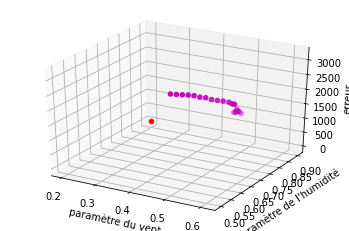

val = 1906.04 et h= 0.01
a_0= 1934.25
a_1= 1884.24
a_2= 1652.25
a_3= 1933.14
a_4= 1658.46
a_5= 1932.48
a_6= 1909.61
a_7= 1742.34
1652.25
inf trouvé
a_2==min_
0.56 0.7200000000000002


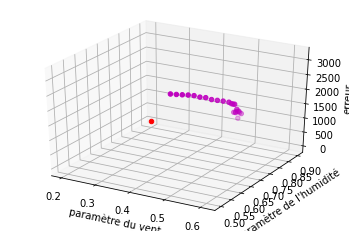

val = 1652.25 et h= 0.01
a_0= 1860.62
a_1= 1650.87
a_2= 1580.85
a_3= 1884.24
a_4= 1614.37
a_5= 1906.04
a_6= 1658.46
a_7= 1612.34
1580.85
inf trouvé
a_2==min_
0.55 0.7300000000000002


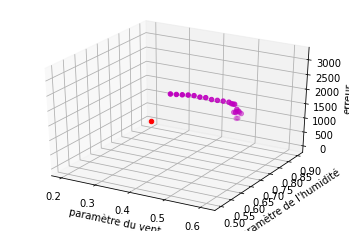

val = 1580.85 et h= 0.01
a_0= 1734.65
a_1= 1571.45
a_2= 1509.08
a_3= 1650.87
a_4= 1508.53
a_5= 1652.25
a_6= 1614.37
a_7= 1512.71
1508.53
inf trouvé
a_4==min_
0.55 0.7400000000000002


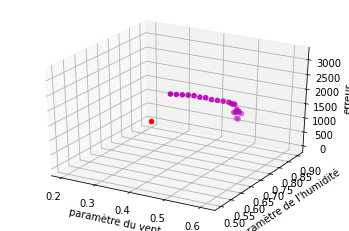

val = 1508.53 et h= 0.01
a_0= 1571.45
a_1= 1509.08
a_2= 1373.04
a_3= 1580.85
a_4= 1444.92
a_5= 1614.37
a_6= 1512.71
a_7= 1468.79
1373.04
inf trouvé
a_2==min_
0.54 0.7500000000000002


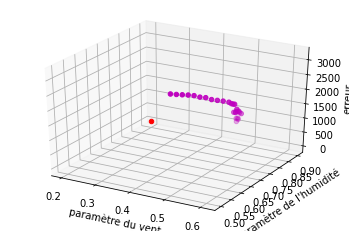

val = 1373.04 et h= 0.01
a_0= 1500.44
a_1= 1375.18
a_2= 1214.5
a_3= 1509.08
a_4= 1217.35
a_5= 1508.53
a_6= 1444.92
a_7= 1342.18
1214.5
inf trouvé
a_2==min_
0.53 0.7600000000000002


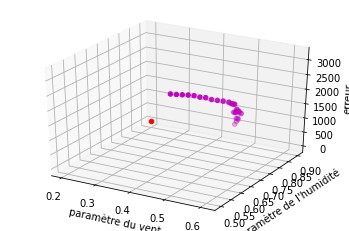

val = 1214.5 et h= 0.01
a_0= 1368.29
a_1= 1211.39
a_2= 1055.07
a_3= 1375.18
a_4= 1122.95
a_5= 1373.04
a_6= 1217.35
a_7= 1144.71
1055.07
inf trouvé
a_2==min_
0.52 0.7700000000000002


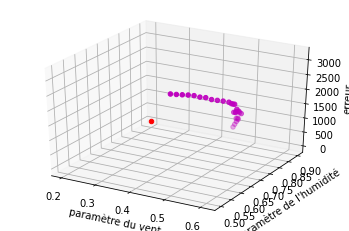

val = 1055.07 et h= 0.01
a_0= 1152.14
a_1= 1044.56
a_2= 964.2
a_3= 1211.39
a_4= 980.43
a_5= 1214.5
a_6= 1122.95
a_7= 980.95
964.2
inf trouvé
a_2==min_
0.51 0.7800000000000002


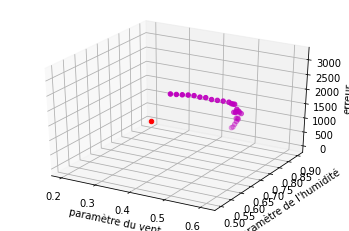

val = 964.2 et h= 0.01
a_0= 1044.15
a_1= 906.65
a_2= 803.81
a_3= 1044.56
a_4= 843.07
a_5= 1055.07
a_6= 980.43
a_7= 880.71
803.81
inf trouvé
a_2==min_
0.5 0.7900000000000003


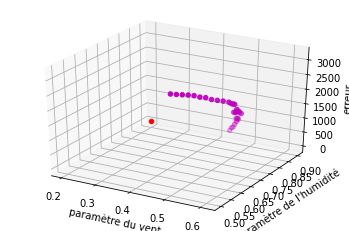

val = 803.81 et h= 0.01
a_0= 891.66
a_1= 809.06
a_2= 767.45
a_3= 906.65
a_4= 780.4
a_5= 964.2
a_6= 843.07
a_7= 781.08
767.45
inf trouvé
a_2==min_
0.49 0.8000000000000003


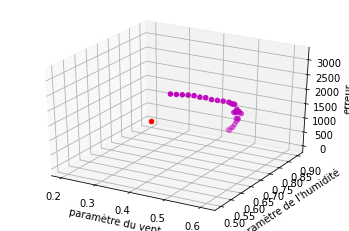

val = 767.45 et h= 0.01
a_0= 805.66
a_1= 749.64
a_2= 678.04
a_3= 809.06
a_4= 683.36
a_5= 803.81
a_6= 780.4
a_7= 731.79
678.04
inf trouvé
a_2==min_
0.48 0.8100000000000003


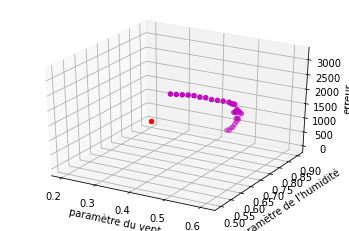

val = 678.04 et h= 0.01
a_0= 717.5
a_1= 678.74
a_2= 648.67
a_3= 749.64
a_4= 662.39
a_5= 767.45
a_6= 683.36
a_7= 660.76
648.67
inf trouvé
a_2==min_
0.47 0.8200000000000003


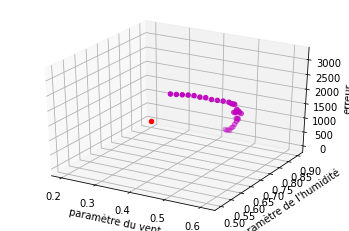

val = 648.67 et h= 0.01
a_0= 679.9
a_1= 651.03
a_2= 600.72
a_3= 678.74
a_4= 599.43
a_5= 678.04
a_6= 662.39
a_7= 599.51
599.43
inf trouvé
a_4==min_
0.47 0.8300000000000003


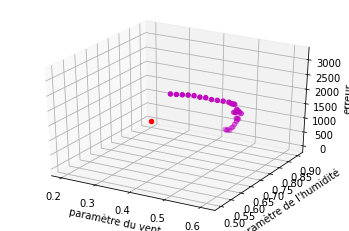

val = 599.43 et h= 0.01
a_0= 651.03
a_1= 600.72
a_2= 539.4
a_3= 648.67
a_4= 570.36
a_5= 662.39
a_6= 599.51
a_7= 569.52
539.4
inf trouvé
a_2==min_
0.45999999999999996 0.8400000000000003


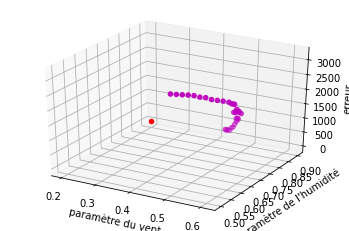

val = 539.4 et h= 0.01
a_0= 598.89
a_1= 534.75
a_2= 493.06
a_3= 600.72
a_4= 510.9
a_5= 599.43
a_6= 570.36
a_7= 521.14
493.06
inf trouvé
a_2==min_
0.44999999999999996 0.8500000000000003


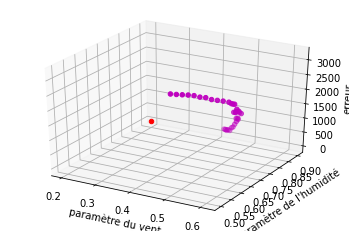

val = 493.06 et h= 0.01
a_0= 513.36
a_1= 479.13
a_2= 421.8
a_3= 534.75
a_4= 444.33
a_5= 539.4
a_6= 510.9
a_7= 465.16
421.8
inf trouvé
a_2==min_
0.43999999999999995 0.8600000000000003


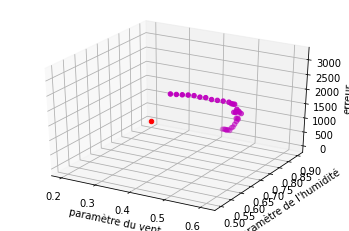

val = 421.8 et h= 0.01
a_0= 468.97
a_1= 421.71
a_2= 406.77
a_3= 479.13
a_4= 407.11
a_5= 493.06
a_6= 444.33
a_7= 418.05
406.77
inf trouvé
a_2==min_
0.42999999999999994 0.8700000000000003


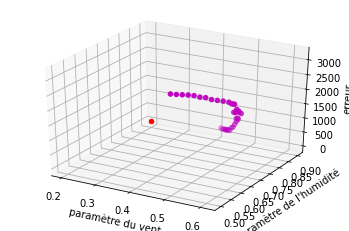

val = 406.77 et h= 0.01
a_0= 412.82
a_1= 399.99
a_2= 338.43
a_3= 421.71
a_4= 337.85
a_5= 421.8
a_6= 407.11
a_7= 366.35
337.85
inf trouvé
a_4==min_
0.42999999999999994 0.8800000000000003


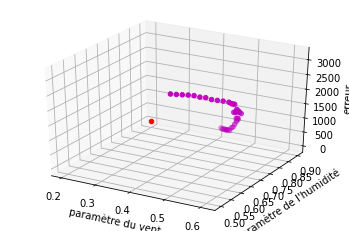

val = 337.85 et h= 0.01
a_0= 399.99
a_1= 338.43
a_2= 317.84
a_3= 406.77
a_4= 328.05
a_5= 407.11
a_6= 366.35
a_7= 329.08
317.84
inf trouvé
a_2==min_
0.41999999999999993 0.8900000000000003


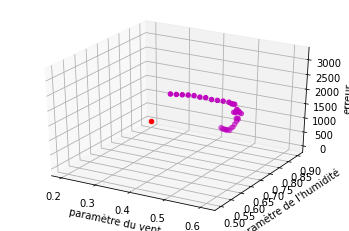

val = 317.84 et h= 0.01
a_0= 326.88
a_1= 289.64
a_2= 263.24
a_3= 338.43
a_4= 279.14
a_5= 337.85
a_6= 328.05
a_7= 304.06
263.24
inf trouvé
a_2==min_
0.4099999999999999 0.9000000000000004


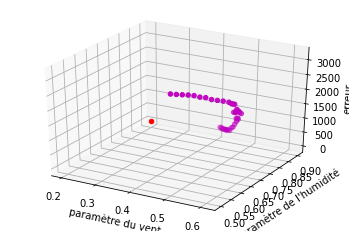

val = 263.24 et h= 0.01
a_0= 280.55
a_1= 260.0
a_2= 236.42
a_3= 289.64
a_4= 264.64
a_5= 317.84
a_6= 279.14
a_7= 275.21
236.42
inf trouvé
a_2==min_
0.3999999999999999 0.9100000000000004


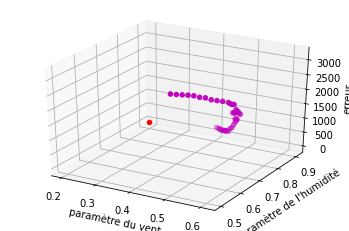

val = 236.42 et h= 0.01
a_0= 230.57
a_1= 220.68
a_2= 210.79
a_3= 260.0
a_4= 234.83
a_5= 263.24
a_6= 264.64
a_7= 256.47
210.79
inf trouvé
a_2==min_
0.3899999999999999 0.9200000000000004


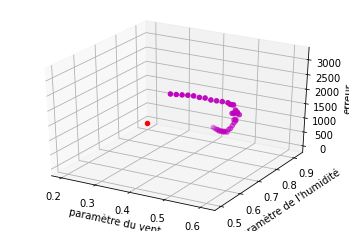

val = 210.79 et h= 0.01
a_0= 201.38
a_1= 192.39
a_2= 192.36
a_3= 220.68
a_4= 205.18
a_5= 236.42
a_6= 234.83
a_7= 244.64
192.36
inf trouvé
a_2==min_
0.3799999999999999 0.9300000000000004


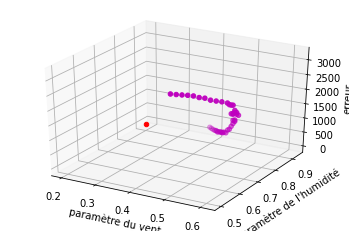

val = 192.36 et h= 0.01
a_0= 164.98
a_1= 189.2
a_2= 198.66
a_3= 192.39
a_4= 203.3
a_5= 210.79
a_6= 205.18
a_7= 205.5
164.98
inf trouvé
a_0==min_
0.3699999999999999 0.9200000000000004


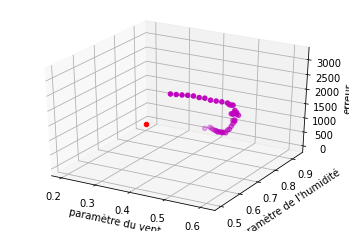

val = 164.98 et h= 0.01
a_0= 171.99
a_1= 155.87
a_2= 173.12
a_3= 181.8
a_4= 189.2
a_5= 201.38
a_6= 192.39
a_7= 192.36
155.87
inf trouvé
a_1==min_
0.3599999999999999 0.9200000000000004


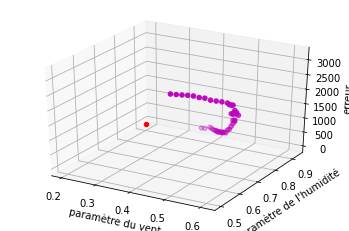

val = 155.87 et h= 0.01
a_0= 159.19
a_1= 153.33
a_2= 169.51
a_3= 171.99
a_4= 173.12
a_5= 181.8
a_6= 164.98
a_7= 189.2
153.33
inf trouvé
a_1==min_
0.34999999999999987 0.9200000000000004


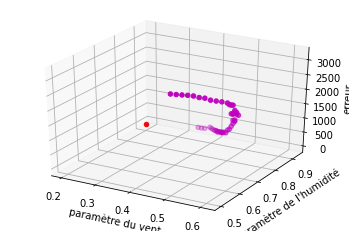

val = 153.33 et h= 0.01
a_1= 149.03
a_2= 153.6
a_3= 159.19
a_4= 169.51
a_5= 171.99
a_6= 155.87
a_7= 173.12
144.47
inf trouvé
a_0==min_
0.33999999999999986 0.9100000000000004


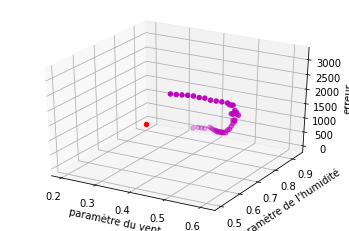

val = 144.47 et h= 0.01
a_0= 145.43
a_1= 136.23
a_2= 133.86
a_3= 159.33
a_4= 149.03
a_5= 162.48
a_6= 159.19
a_7= 153.33
133.86
inf trouvé
a_2==min_
0.32999999999999985 0.9200000000000004


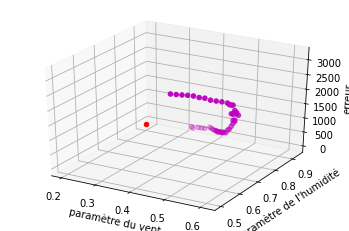

val = 133.86 et h= 0.01
a_0= 117.36
a_1= 123.53
a_2= 151.2
a_3= 136.23
a_4= 149.59
a_5= 144.47
a_6= 149.03
a_7= 153.6
117.36
inf trouvé
a_0==min_
0.31999999999999984 0.9100000000000004


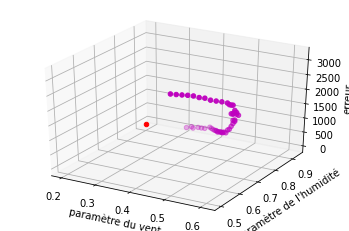

val = 117.36 et h= 0.01
a_0= 112.18
a_1= 115.0
a_2= 118.96
a_3= 131.05
a_4= 123.53
a_5= 145.43
a_6= 136.23
a_7= 133.86
112.18
inf trouvé
a_0==min_
0.30999999999999983 0.9000000000000004


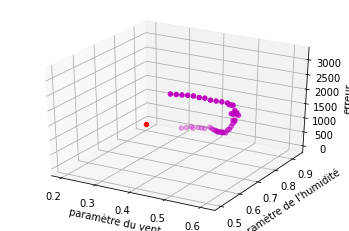

val = 112.18 et h= 0.01
a_0= 126.23
a_1= 108.46
a_2= 111.12
a_3= 154.47
a_4= 115.0
a_5= 162.05
a_6= 131.05
a_7= 117.36
108.46
inf trouvé
a_1==min_
0.2999999999999998 0.9000000000000004


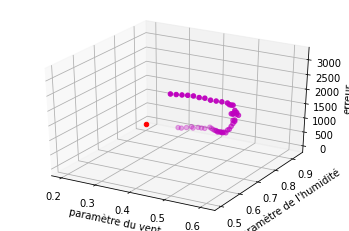

val = 108.46 et h= 0.01
a_0= 124.42
a_1= 103.9
a_2= 110.28
a_3= 126.23
a_4= 111.12
a_5= 154.47
a_6= 112.18
a_7= 115.0
103.9
inf trouvé
a_1==min_
0.2899999999999998 0.9000000000000004


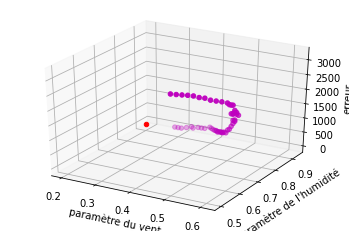

val = 103.9 et h= 0.01
a_0= 116.07
a_1= 96.61
a_2= 100.71
a_3= 124.42
a_4= 110.28
a_5= 126.23
a_6= 108.46
a_7= 111.12
96.61
inf trouvé
a_1==min_
0.2799999999999998 0.9000000000000004


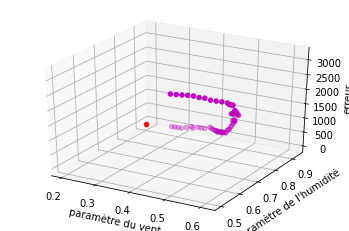

val = 96.61 et h= 0.01
a_0= 112.92
a_1= 78.06
a_2= 94.01
a_3= 116.07
a_4= 100.71
a_5= 124.42
a_6= 103.9
a_7= 110.28
78.06
inf trouvé
a_1==min_
0.2699999999999998 0.9000000000000004


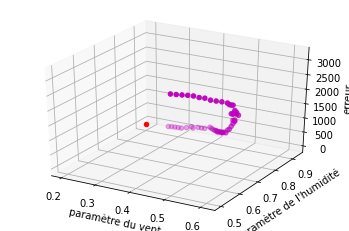

val = 78.06 et h= 0.01
a_0= 96.4
a_1= 74.68
a_2= 103.78
a_3= 112.92
a_4= 94.01
a_5= 116.07
a_6= 96.61
a_7= 100.71
74.68
inf trouvé
a_1==min_
0.2599999999999998 0.9000000000000004


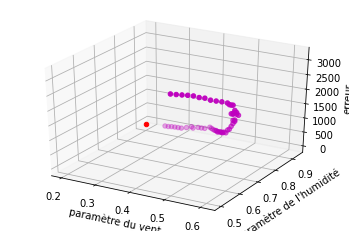

val = 74.68 et h= 0.01
a_0= 88.88
a_1= 69.05
a_2= 63.94
a_3= 96.4
a_4= 103.78
a_5= 112.92
a_6= 78.06
a_7= 94.01
63.94
inf trouvé
a_2==min_
0.24999999999999978 0.9100000000000004


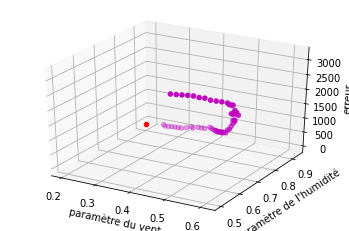

val = 63.94 et h= 0.01
a_0= 27.52
a_1= 59.77
a_2= 81.07
a_3= 69.05
a_4= 84.9
a_5= 74.68
a_6= 103.78
a_7= 89.27
27.52
inf trouvé
a_0==min_
0.23999999999999977 0.9000000000000004


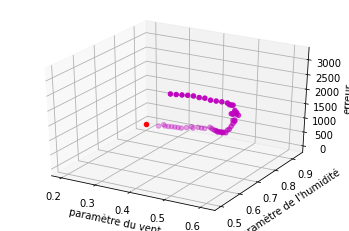

val = 27.52 et h= 0.01
a_0= 46.69
a_1= 21.81
a_2= 56.69
a_3= 87.75
a_4= 59.77
a_5= 88.88
a_6= 69.05
a_7= 63.94
21.81
inf trouvé
a_1==min_
0.22999999999999976 0.9000000000000004


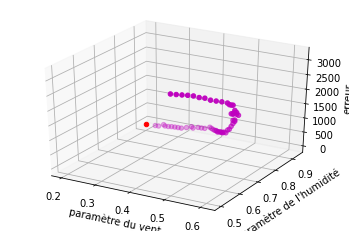

val = 21.81 et h= 0.01
a_0= 41.16
a_1= 10.04
a_2= 55.43
a_3= 46.69
a_4= 56.69
a_5= 87.75
a_6= 27.52
a_7= 59.77
10.04
inf trouvé
a_1==min_
0.21999999999999975 0.9000000000000004


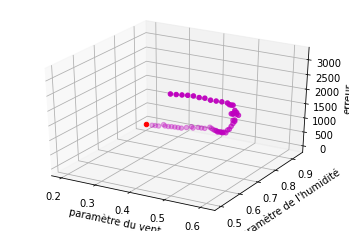

val = 10.04 et h= 0.01
a_0= 43.12
a_1= 7.8
a_2= 48.08
a_3= 41.16
a_4= 55.43
a_5= 46.69
a_6= 21.81
a_7= 56.69
7.8
inf trouvé
a_1==min_
0.20999999999999974 0.9000000000000004


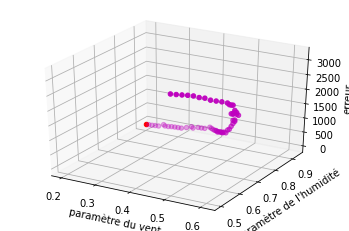

val = 7.8 et h= 0.01
a_0= 46.01
a_1= 0.0
a_2= 48.27
a_3= 43.12
a_4= 48.08
a_5= 41.16
a_6= 10.04
a_7= 55.43
0.0
inf trouvé
a_1==min_
0.19999999999999973 0.9000000000000004


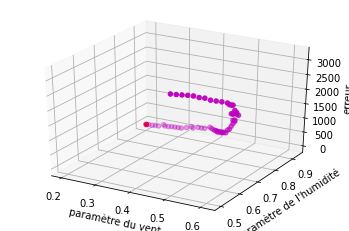

val = 0.0 et h= 0.01


In [ ]:
apprentisage (0.5,0.5,liste_NDVI_point_vent_tempsenfeu_val_directionvent,1,0.0000001,[],[],[],0.01)